Number of instances = 131724
Number of attributes = 6
Number of duplicate rows = 5939
Number of rows before discarding duplicates = 129933
Number of rows after discarding duplicates = 123994
Number of instances = 175200
Number of attributes = 6


PROPRIETARYNAME  \
0                                         Sterile Diluent   
1                                                  Amyvid   
2                                     Quinidine Gluconate   
4                                               Trulicity   
5                                                EMGALITY   
6                                                   TALTZ   
7                                                EMGALITY   
8                                                  Prozac   
9                                               Strattera   
10                                              Strattera   
11                                              Strattera   
12                                                Symbyax   
13                                                Symbyax   
14                                                Symbyax   
15                                                Symbyax   
16                                                Symbyax   
17                                               Cymbalta   
18                                              Strattera   
19                                              Strattera   
20                                               Cymbalta   
21                                              Strattera   
22                                              Strattera   
23                                               Cymbalta   
24                                                Zyprexa   
25                                                Zyprexa   
26                                                Zyprexa   
27                                                Zyprexa   
28                                               Olumiant   
29                                                 Evista   
30                                                Zyprexa   
...                                                   ...   
129903  bareMinerals Original Foundation Broad Spectru...   
129904  bareMinerals Original Foundation Broad Spectru...   
129905  bareMinerals Original Foundation Broad Spectru...   
129906  bareMinerals Original Foundation Broad Spectru...   
129907                      Deep Bisque Foundation SPF 20   
129908                      Golden Fair Foundation SPF 15   
129909                    Fairly Medium Foundation SPF 15   
129910                                             Loprox   
129911                                   MetroGel-Vaginal   
129912                                           Minitran   
129913                                           Minitran   
129914                                           Minitran   
129915                                           Minitran   
129916                         Calcium Disodium Versenate   
129917                                             Aldara   
129918                                            Zyclara   
129919                                            Zyclara   
129920                                            Zyclara   
129921                                          Esoterica   
129922                                          Esoterica   
129923                                          Esoterica   
129924                                              ZIANA   
129925                                            Solodyn   
129926                                            Solodyn   
129927                                            Solodyn   
129928                                            Solodyn   
129929                                            Solodyn   
129930                                              Vanos   
129931                                               Luzu   
129932                Kool Comfort Pain Relieving Roll-On   

        ACTIVE_NUMERATOR_STRENGTH  
0                             1.0  
1                            51.0  
2                            80.0  
4                             1.5  
5                           120.0  
6                            80.0  
7      

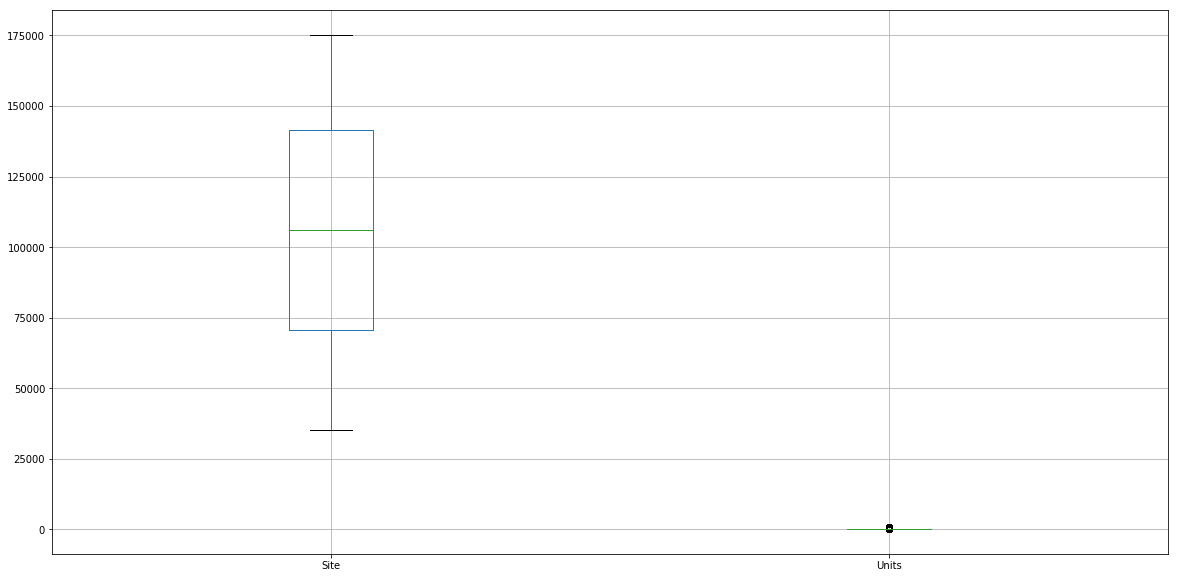

In [1]:
import os
import pandas as pd
import numpy as np

import tkinter as tk
from tkinter import filedialog
global data

from scipy.stats import zscore

#---READ DATA FILES---
path = "./DataSet/"

filename_read = os.path.join(path,"product.csv")
df_drugs = pd.read_csv(filename_read,na_values=['NA','?'])

filename_read = os.path.join(path,"LaqnData.csv")
df_air = pd.read_csv(filename_read,na_values=['NA','?'])

filename_read = os.path.join(path,"product2.csv")
df_air2 = pd.read_csv(filename_read,na_values=['NA','?'])




#---MISSING VALUES---
data = df_air2
outpath = os.path.join(path,"out.csv")
data.columns = ['Site', 'Species', 'ReadingDateTime', 'Value', 'Units', 'Provisional or Ratified']

print('Number of instances = %d' %(data.shape[0]))
print('Number of attributes = %d' %(data.shape[1]))
data=data.drop(['Provisional or Ratified'], axis=1)

#dropping all rows that contain missing values
data = data.dropna(axis='rows')

data.head()


#writing modified data frame to csv file
data.to_csv(outpath)
#resulting file has no missing value rows

#---AGGREGATION---
daily = pd.read_csv('LaqnData.csv', header = 'infer')
daily.index = pd.to_datetime(daily['ReadingDateTime'])
daily = daily['Value']
ax = daily.plot(kind = 'line',figsize=(15,3))
ax.set_title('Daily Air Quality (variance = %.4f)' % (daily.var()))

#---OUTLIERS---
%matplotlib inline
# data2 = data.drop(['Class'],axis=1)
data.boxplot(figsize=(20,10))


#---DUPLICATE DATA---
df = df_drugs
df.drop(['PRODUCTID', 'PRODUCTNDC'], axis=1, inplace=True)
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
data2 = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (data2.shape[0]))


#---SHUFFLING DATA---
df = df_drugs
np.random.seed(38) #uncomment this line to get the same shuffle each time

df = df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)
# use inplace=False
df


#---SORTING DATAFRAMES---
df = df_drugs

df = df.sort_values(by='PROPRIETARYNAME', ascending=True, axis=0)
df


#---SAVING A DATA FRAME---
data = df_air
exportPath = os.path.join(path,"no_missing_val.csv")
data.columns = ['Site', 'Species', 'ReadingDateTime', 'Value', 'Units', 'Provisional or Ratified']

print('Number of instances = %d' %(data.shape[0]))
print('Number of attributes = %d' %(data.shape[1]))
data=data.drop(['Provisional or Ratified'], axis=1)

#dropping all rows that contain missing values
data = data.dropna(axis='rows')

#saving
data.to_csv(exportPath, index = None, header=True)


"""
#---THIS PART ONLY WORKS OUTSIDE OF NOTEBOOK, IDK---
data.head()

root = tk.Tk()

canvas1 = tk.Canvas(root, width = 300, height = 300, bg = 'lightsteelblue2', relief = 'raised')
canvas1.pack()

def saveCSV():
    exportPath = filedialog.asksaveasfilename(defaultextension ='.csv')
    data.to_csv(exportPath, index = None, header=True)
    
saveAsButton_CSV = tk.Button(text='Export CSV', command=saveCSV)
canvas1.create_window(150,150, window=saveAsButton_CSV)

root.mainloop()

#this code needs to be run outside of Jupiter notebooks using python through terminal
#to create a GUI window that will allow the user to save the modified (cleaned) dataset specified.
"""

#---DROPPING FIELDS---
df = df_drugs

df.drop(axis=1, index=[3], columns=['ROUTENAME', 'PROPRIETARYNAMESUFFIX'], inplace=True)
df[0:5]



#---CALCULATED FIELDS---
df = df_drugs
df['ACTIVE_NUMERATOR_STRENGTH'] = pd.to_numeric(df['ACTIVE_NUMERATOR_STRENGTH'], errors='coerce')
#join 2 columns together
col_strength = df['ACTIVE_NUMERATOR_STRENGTH']
col_drugname = df['PROPRIETARYNAME']
result = pd.concat([col_drugname,col_strength],axis=1)
#drop all rows with NaN values
result = result.dropna()
#calculate
result.insert(1,'3x_strength',(result['ACTIVE_NUMERATOR_STRENGTH']*3).astype(float))
result


#---FEATURE NORMALIZATION---
df = df_drugs
df['ACTIVE_NUMERATOR_STRENGTH'] = pd.to_numeric(df['ACTIVE_NUMERATOR_STRENGTH'], errors='coerce')
#join 2 columns together
col_strength = df['ACTIVE_NUMERATOR_STRENGTH']
col_drugname = df['PROPRIETARYNAME']
result = pd.concat([col_drugname,col_strength],axis=1)
#drop all rows with NaN values
result = result.dropna()
#calculate
result.insert(1,'3x_strength',(result['ACTIVE_NUMERATOR_STRENGTH']*3).astype(float))
#zscore
result['3x_strength'] = zscore(result['3x_strength'])
result


#---CONCATENATION---
df = df_drugs

col_strength = df['ACTIVE_NUMERATOR_STRENGTH']
col_drugname = df['PROPRIETARYNAME']

result = pd.concat([col_drugname,col_strength],axis=1)
result

